# Training des RNN
Import der verwendeten Pakete

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from joblib import load
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

## Einstellungen für das Speichern der Bilddateien

In [12]:
save_plot = False
fontsize = 14
y_lim = 2.6,4.1

## Laden der Trainings- und Testdatensätze und dem StandardScaler

In [3]:
X_train, y_train = load('../../data/trainingsdata/LGT92-23-33_trainingsdata_for_RNN')
X_train_raw, y_train_raw = load('../../data/trainingsdata/LGT92-23-33_trainingsdata_for_RNN_RAW')
X_23_test, y_23_test = load('../../data/testdata/LGT92-23_restructured_testdata_for_RNN')
X_23_test_raw, y_23_test_raw = load('../../data/testdata/LGT92-23_testdata_for_RNN_RAW')
X_33_test, y_33_test = load('../../data/testdata/LGT92-33_restructured_testdata_for_RNN')
X_33_test_raw, y_33_test_raw = load('../../data/testdata/LGT92-33_testdata_for_RNN_RAW')

scaler_y = load('../../data/scaler/train_scaler_thesis_y.joblib')

## Aufbau des RNN-Modells mit LSTM-Zellen

In [4]:
batch_size = 32
window = 24
indicators = 5

model = Sequential()
model.add(LSTM(units=64, dropout=.2, input_shape=(window, indicators), return_sequences=True))
model.add(LSTM(units=64, dropout=.2))
model.add(Dense(units=1))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()

Metal device set to: Apple M1 Pro


2023-06-26 07:00:56.209376: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-26 07:00:56.209508: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 64)            17920     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 51,009
Trainable params: 51,009
Non-trainable params: 0
_________________________________________________________________


## Training des Modells
Training des Modells unter Verwendung der Callback-Funktionen "EarlyStopping()" und "ModelCheckpoint()"

Hinweis: Die Ergebnisse des Trainings können auf verschiedenen Plattformen variieren, da Keras-Modelle mit zufälligen Gewichten initialisiert werden. Dies führt zu unterschiedlichen Startpunkten auf der Verlustfunktion und kann die Anzahl der benötigten Epochen und die Art der Verlaufskurven beeinflussen.

In [5]:
## TO TRAIN
early = EarlyStopping(monitor='val_loss', patience=9)
check = ModelCheckpoint(filepath='../../data/model/train_model_thesis.h5',
                        monitor='val_loss', save_best_only=True)

history = model.fit(X_train, y_train,
                    epochs=100, batch_size=batch_size,
                    validation_data=(X_23_test, y_23_test),
                    callbacks=[early, check])

Epoch 1/100


2023-06-26 07:00:56.536032: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-06-26 07:00:57.375459: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-26 07:00:57.534451: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-26 07:00:57.651906: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-26 07:00:57.780164: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  3/125 [..............................] - ETA: 3s - loss: 0.8240 - mae: 0.7736  

2023-06-26 07:00:58.026563: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - ETA: 0s - loss: 0.0848 - mae: 0.1505

2023-06-26 07:01:01.195011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-26 07:01:01.247142: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-26 07:01:01.317106: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 5s 27ms/step - loss: 0.0848 - mae: 0.1505 - val_loss: 0.0012 - val_mae: 0.0315
Epoch 2/100
125/125 [==============================] - 3s 21ms/step - loss: 0.0292 - mae: 0.0850 - val_loss: 0.0092 - val_mae: 0.0948
Epoch 3/100
125/125 [==============================] - 3s 21ms/step - loss: 0.0220 - mae: 0.0670 - val_loss: 0.0023 - val_mae: 0.0473
Epoch 4/100
125/125 [==============================] - 3s 21ms/step - loss: 0.0245 - mae: 0.0654 - val_loss: 8.3767e-04 - val_mae: 0.0274
Epoch 5/100
125/125 [==============================] - 3s 21ms/step - loss: 0.0184 - mae: 0.0595 - val_loss: 0.0144 - val_mae: 0.1195
Epoch 6/100
125/125 [==============================] - 3s 21ms/step - loss: 0.0182 - mae: 0.0506 - val_loss: 7.8629e-04 - val_mae: 0.0261
Epoch 7/100
125/125 [==============================] - 3s 21ms/step - loss: 0.0168 - mae: 0.0480 - val_loss: 2.0702e-04 - val_mae: 0.0117
Epoch 8/100
125/125 [==============================] - 3s 21ms

## Darstellung des Trainingsverlaufs anhand der Loss-Kurve

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.013602557592093945


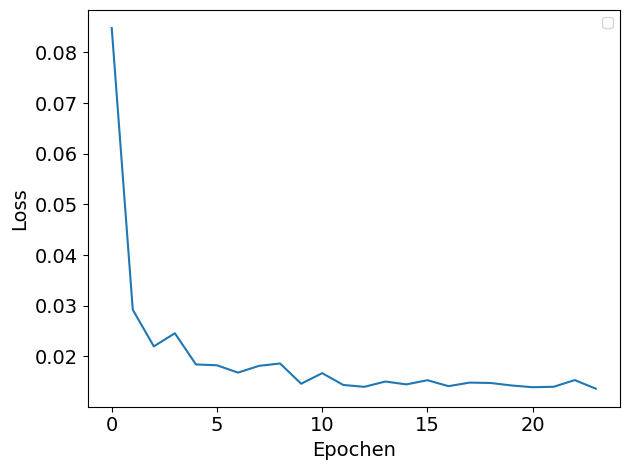

In [15]:
loss_mse = history.history['loss']
plt.plot(loss_mse)
plt.xlabel('Epochen', fontsize=fontsize)
plt.ylabel('Loss', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.legend()
plt.tight_layout()
if save_plot:
    plt.savefig(f'../../data/png/loss_model_thesis', pad_inches=2)

print(min(loss_mse))

## Prädiktion über die Trainingsdaten
Das trainierte Modell wird geladen und eine Prädiktion über die Trainingsdaten erzeugt. Das Ergebnis wird visualisiert.

  1/125 [..............................] - ETA: 45s

2023-06-26 07:02:04.063014: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-26 07:02:04.112123: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-26 07:02:04.187126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 2s 10ms/step
[[3.843859 ]
 [3.8514943]
 [3.850119 ]
 ...
 [2.6894178]
 [2.6894178]
 [2.6894178]]


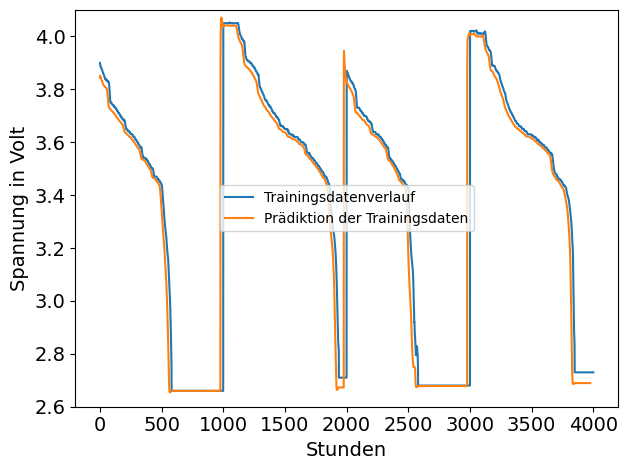

In [7]:
model = load_model('../../data/model/train_model_thesis.h5')

### Mit Neuronalem Netz (Achtung: die y-Vorhersagen müssen reskaliert werden (wegen Standardisierung))
y_pred = model.predict(X_train)
y_pred_inv = scaler_y.inverse_transform(y_pred)

print(y_pred_inv)

plt.plot(np.linspace(1, len(y_train_raw), len(y_train_raw)), y_train_raw,
         label='Trainingsdatenverlauf')
plt.plot(np.linspace(1, len(y_pred_inv), len(y_pred_inv)), y_pred_inv,
         label='Prädiktion der Trainingsdaten')
plt.xlabel('Stunden', fontsize=fontsize)
plt.ylabel('Spannung in Volt', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.ylim(y_lim)
plt.legend()
plt.tight_layout()
if save_plot:
    plt.savefig(f'../../data/png/predict_train_model_thesis', pad_inches=2)
plt.show()

## Prädiktion und (Evaluation) über den Testdatensatz des Sensor LGT92-325723

4/4 [==============================] - 0s 35ms/step


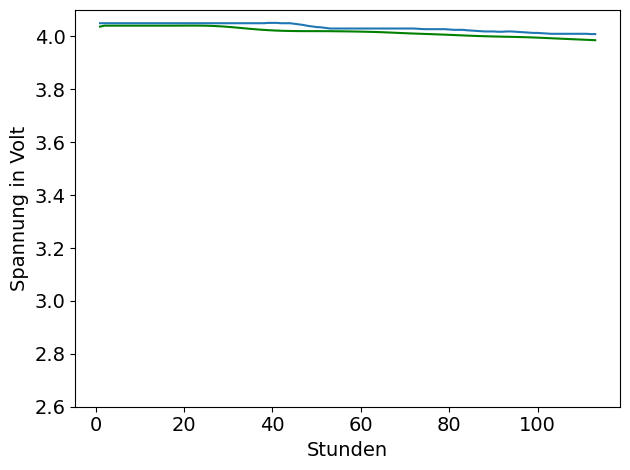

2023-06-26 07:02:06.018239: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-26 07:02:06.074573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-26 07:02:06.148709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 1s 42ms/step - loss: 1.9407e-04 - mae: 0.0129
MAE:  0.012851445935666561


In [8]:
# make prediction
y_pred_test_23 = model.predict(X_23_test)
y_pred_test_23_inv = scaler_y.inverse_transform(y_pred_test_23)

# plot
plt.plot(np.linspace(1, len(y_pred_test_23_inv), len(y_pred_test_23_inv)), y_pred_test_23_inv, color='green')
plt.plot(np.linspace(1, len(y_23_test_raw[:len(y_pred_test_23)]), len(y_23_test_raw[:len(y_pred_test_23)])), y_23_test_raw[:len(y_pred_test_23)])
plt.xlabel('Stunden', fontsize=fontsize)
plt.ylabel('Spannung in Volt', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.ylim(y_lim)
plt.tight_layout()
if save_plot:
    plt.savefig(f'../../data/png/test_predict_testdata_23', pad_inches=2)
plt.show()

# Evaluating the model on a test data set
evaluate = model.evaluate(X_23_test, y_23_test)
# Metrics output
print('MAE: ', evaluate[1])

## Prädiktion und (Evaluation) über den Testdatensatz des Sensor LGT92-325733

4/4 [==============================] - 0s 36ms/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


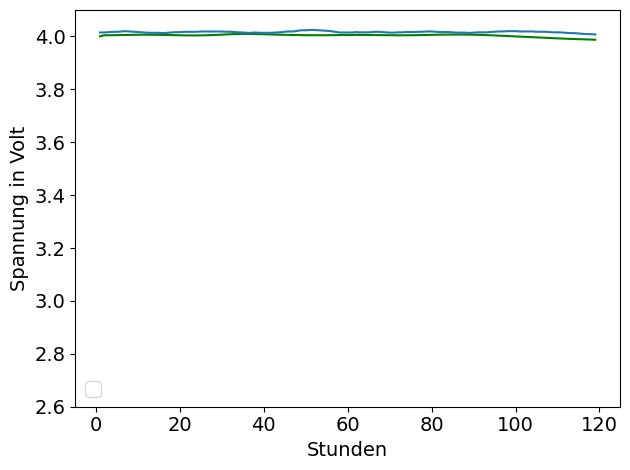

4/4 [==============================] - 0s 40ms/step - loss: 4.9543e-04 - mae: 0.0203
MAE:  0.020337320864200592


In [9]:
# make prediction
y_pred_test_33 = model.predict(X_33_test)
y_pred_test_33_inv = scaler_y.inverse_transform(y_pred_test_33)

# plot
plt.plot(np.linspace(1, len(y_pred_test_33_inv), len(y_pred_test_33_inv)), y_pred_test_33_inv, color='green')
plt.plot(np.linspace(1, len(y_33_test_raw[:len(y_pred_test_33)]), len(y_33_test_raw[:len(y_pred_test_33)])), y_33_test_raw[:len(y_pred_test_33)])
plt.xlabel('Stunden', fontsize=fontsize)
plt.ylabel('Spannung in Volt', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.ylim(y_lim)
plt.tight_layout()
if save_plot:
    plt.savefig(f'../../data/png/test_predict_testdata_23', pad_inches=2)
plt.show()

# Evaluating the model on a test data set
evaluate = model.evaluate(X_33_test, y_33_test)
# Metrics output
print('MAE: ', evaluate[1])